# xgboost


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import xgboost as xgb
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import log_loss

In [2]:
raw_train_data = pd.read_csv("D:\\train.csv")
raw_test_data = pd.read_csv("D:\\test.csv")

In [3]:
print(raw_train_data.shape)
print(raw_test_data.shape)

(61878, 95)
(144368, 94)


In [4]:
Train_data = raw_train_data.iloc[:, 1:95]
labels = set(Train_data.iloc[:,93:94].target)
Valid_x = np.array(raw_test_data.iloc[:, 1:94])
Total_x = np.array(Train_data.iloc[:,0:93])
Total_y = np.array(Train_data.iloc[:,93:94])

In [5]:
print(f"The current has the following label {labels}")
print(f"The shape the Total_X {Total_x.shape}")
print(f"The shape the Total_Y {Total_y.shape}")
print(f"The shape the Valid_X {Valid_x.shape}")
print(f"Check Nan in Total_X {set(np.isnan(Total_x).any(axis=1))}")
# print(f"Check Nan in Train_Y {np.isnan(Train_Y).any(axis=1)}")
print(f"Check Nan in Valid_X {set(np.isnan(Valid_x).any(axis=1))}")

The current has the following label {'Class_9', 'Class_3', 'Class_1', 'Class_4', 'Class_6', 'Class_7', 'Class_8', 'Class_2', 'Class_5'}
The shape the Total_X (61878, 93)
The shape the Total_Y (61878, 1)
The shape the Valid_X (144368, 93)
Check Nan in Total_X {False}
Check Nan in Valid_X {False}


In [6]:
np.random.seed(10)
Total_X,Total_Y = shuffle(Total_x,Total_y)

In [7]:
# In this part using the previous 50000 to do the training and the last data to do the test check the score
Train_X = Total_X[:50000]
Train_Y = Total_Y[:50000]
Test_X = Total_X[50000:]
Test_Y = Total_Y[50000:]
print(Train_X.shape)
print(Train_Y.shape)
print(Test_X.shape)
print(Test_Y.shape)

(50000, 93)
(50000, 1)
(11878, 93)
(11878, 1)


In [8]:
Train_Y_num = list()
for item in Train_Y:
    Train_Y_num.append(int(item[-1][-1])-1)
# print(Train_Y_num)

In [9]:
Training_data_xgb = xgb.DMatrix(Train_X,Train_Y_num)
Testing_data_xgb = xgb.DMatrix(Test_X)

In [10]:
params = {"objective": "multi:softprob", "eval_metric":"mlogloss", "num_class": 9}

In [11]:
#number of iterations - initial 20, 
gbm = xgb.train(params, Training_data_xgb, 200)
# predict_Y_xgb = gbm.predict(Testing_data_xgb)
# 10   acc: 0.77
# 50   acc: 0.80
# 100   acc: 0.81
# 120   acc: 0.81
# 130   acc: 0.82
# 180   acc: 0.82
# 300   acc: 0.82
# 1000   acc: 0.82

In [12]:
predict_Y_xgb = gbm.predict(Testing_data_xgb)

In [13]:
print(predict_Y_xgb)

[[4.7290634e-04 9.0998012e-01 5.8952454e-02 ... 8.9137023e-04
  9.1283611e-05 6.5749497e-05]
 [4.1591779e-06 1.3025296e-05 4.7621497e-06 ... 2.2818611e-05
  6.3180203e-05 1.0312075e-05]
 [3.3377859e-07 3.5194153e-05 9.9295175e-07 ... 4.6567749e-07
  1.5351237e-06 9.5585904e-07]
 ...
 [2.9206492e-05 9.4681345e-06 1.9150623e-06 ... 3.0162169e-06
  3.8451467e-06 8.4500944e-06]
 [1.1137722e-02 3.1286850e-06 2.1926508e-05 ... 2.5693560e-04
  2.2075700e-03 2.1232420e-03]
 [9.4026982e-06 9.0647691e-01 8.6618550e-02 ... 6.1061444e-05
  6.9830792e-05 2.5089566e-06]]


In [14]:
result_list = list()
for item in predict_Y_xgb:
    result_list.append(np.where(item==max(item))[0].tolist()[0]+1)
# print(result_list)


In [15]:
ground_true_label_Y = [int(item[-1][-1]) for item in Test_Y]
# print(ground_true_label_Y)

In [16]:
log_loss_result = log_loss(Test_Y, predict_Y_xgb)
print(log_loss_result)
# 130 0.4691932772102278
# 180 0.46355069379757285
# 200 0.46340078275644003

0.46340078275644003


In [17]:
normal_xgboost_predict = metrics.classification_report(ground_true_label_Y,result_list)
print(normal_xgboost_predict)

              precision    recall  f1-score   support

           1       0.73      0.58      0.64       346
           2       0.75      0.84      0.79      3070
           3       0.61      0.54      0.58      1484
           4       0.74      0.52      0.61       495
           5       0.98      0.98      0.98       586
           6       0.95      0.95      0.95      2730
           7       0.77      0.67      0.72       554
           8       0.90      0.93      0.92      1650
           9       0.88      0.88      0.88       963

    accuracy                           0.82     11878
   macro avg       0.81      0.77      0.78     11878
weighted avg       0.82      0.82      0.82     11878



In [20]:
# print(result_list)
# print(ground_true_label_Y)

In [25]:
ground_truth_dict = {"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}
xgboost_result_dict = {"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}

In [26]:
for item in ground_true_label_Y:
    ground_truth_dict[f"Class_{item}"] += 1
    
for item in result_list:
    xgboost_result_dict[f"Class_{item}"] += 1


In [27]:
print(ground_truth_dict)
print(xgboost_result_dict)

{'Class_1': 346, 'Class_2': 3070, 'Class_3': 1484, 'Class_4': 495, 'Class_5': 586, 'Class_6': 2730, 'Class_7': 554, 'Class_8': 1650, 'Class_9': 963}
{'Class_1': 275, 'Class_2': 3469, 'Class_3': 1314, 'Class_4': 350, 'Class_5': 586, 'Class_6': 2736, 'Class_7': 478, 'Class_8': 1702, 'Class_9': 968}


In [28]:
import matplotlib.pyplot as plt

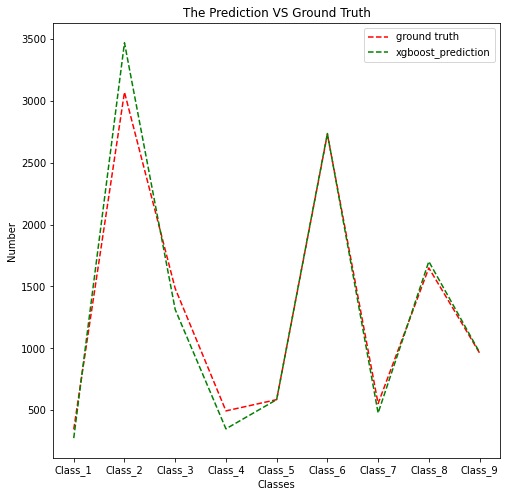

In [29]:
plt.figure(figsize=(8, 8))
l1=plt.plot(ground_truth_dict.keys(),ground_truth_dict.values(),'r--',label='ground truth')
l2=plt.plot(xgboost_result_dict.keys(),xgboost_result_dict.values(),'g--',label='xgboost_prediction')
plt.title('The Prediction VS Ground Truth')
plt.xlabel('Classes')
plt.ylabel('Number')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_xgboost = confusion_matrix(result_list, ground_true_label_Y)
plt.imshow(confusion_xgboost, cmap=plt.cm.Blues)